# Machine learning: Coputer vision

- what does it mean to see? what is the differecnce between cat and dog
- random (10% performance)
- liner classification based on pixels
- math review: matrices, log, exp, derrivative, gradient

- neural networks and gradient descent
- cnn

In [1]:
from scipy.misc import imread, imsave, imresize
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import time

# helpers, nothing interesting inside
from cs231nlib.utils import load_CIFAR10;
from cs231nlib.utils import visualize_CIFAR;

print("Hellow world")

Hellow world


In [2]:
# wow efect about comuter vision
# why me: the list of comeplted courses
# show elements
# 2 presentations: 1) basics 2) neural networks and CNN

### What is vision?

/Users/odats/openai/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


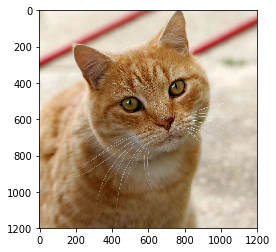

shape: uint8 (1199, 1200, 3)
total numbers: 4316400
first 100 elements from the list [218 209 176 217 208 175 216 207 174 217 208 177 220 211 180 221 212 181
 220 213 184 220 213 184 219 212 184 220 213 185 220 213 187 220 214 188
 221 215 191 222 216 192 222 216 192 223 217 193 225 218 189 225 218 190
 226 219 191 227 220 194 229 221 198 232 224 203 233 225 206 235 226 209
 232 223 208 233 224 209 233 224 209 234 225 210 235 226 209 236 227 210
 237 228 211 238 230 211 238 229 214 239]


In [3]:
img = imread('assets/cat.jpg')

plt.imshow(img)
plt.show()

print("shape:", img.dtype, img.shape)
print("total numbers:", np.prod(np.array(img.shape)))

print("first 100 elements from the list", img.flatten()[:100])

### What do you see?

/Users/odats/openai/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


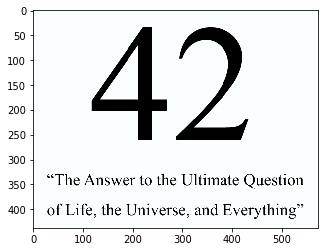

In [4]:
def what_is_this(img):
    plt.imshow(imread('assets/42_Answer.jpg'))
    plt.show()
    
what_is_this(img)

### Define answers space

In [5]:
answers = ['cat', 'dog', 'man']

The task in Image Classification is to predict a single label for a given image. Images are 3-dimensional arrays of integers from 0 to 255, of size Width x Height x 3. The 3 represents the three color channels Red, Green, Blue.

### Challenges

![title](assets/challenges.jpeg)

### Data-driven approach: Input -> Learning -> Evaluation

Example image classification dataset: CIFAR-10. One popular toy image classification dataset is the CIFAR-10 dataset. This dataset consists of 60,000 tiny images that are 32 pixels high and wide. Each image is labeled with one of 10 classes (for example “airplane, automobile, bird, etc”). These 60,000 images are partitioned into a training set of 50,000 images and a test set of 10,000 images. In the image below you can see 10 random example images from each one of the 10 classes:

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


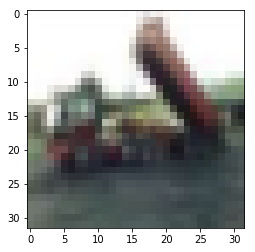

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


def unpickle(file):
 '''Load byte data from file'''
 with open(file, 'rb') as f:
  data = pickle.load(f, encoding='latin-1')
  return data


def load_cifar10_data(data_dir):
 '''Return train_data, train_labels, test_data, test_labels
 The shape of data is 32 x 32 x3'''
 train_data = None
 train_labels = []

 for i in range(1, 6):
  data_dic = unpickle(data_dir + "/data_batch_{}".format(i))
  if i == 1:
   train_data = data_dic['data']
  else:
   train_data = np.vstack((train_data, data_dic['data']))
  train_labels += data_dic['labels']

 test_data_dic = unpickle(data_dir + "/test_batch")
 test_data = test_data_dic['data']
 test_labels = test_data_dic['labels']

 train_data = train_data.reshape((len(train_data), 3, 32, 32))
 train_data = np.rollaxis(train_data, 1, 4)
 train_labels = np.array(train_labels)

 test_data = test_data.reshape((len(test_data), 3, 32, 32))
 test_data = np.rollaxis(test_data, 1, 4)
 test_labels = np.array(test_labels)

 return train_data, train_labels, test_data, test_labels

data_dir = 'data/CIFAR10'

train_data, train_labels, test_data, test_labels = load_cifar10_data(data_dir)

print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)

# In order to check where the data shows an image correctly
plt.imshow(train_data[2])
plt.show()

In [7]:
## load dataset

#Xtr, Ytr, Xte, Yte=load_CIFAR10("data/CIFAR10");
Xtr, Ytr, Xte, Yte=load_cifar10_data(data_dir)

print(Xtr.shape[0])
print(Xtr.shape[1])
print(Xtr.shape[2])
print(Xtr.shape[3])

# flatten out all images to be one-dimensional
Xtr_rows = Xtr.reshape(Xtr.shape[0], 32 * 32 * 3) # Xtr_rows becomes 50000 x 3072
Xte_rows = Xte.reshape(Xte.shape[0], 32 * 32 * 3) # Xte_rows becomes 10000 x 3072
    


50000
32
32
3


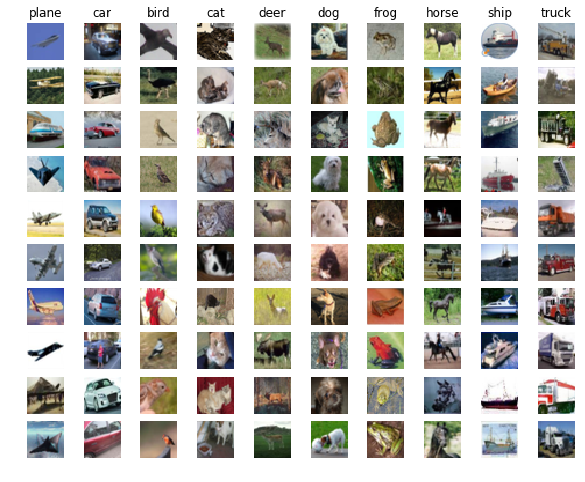

In [8]:
## plot configuration

plt.rcParams['figure.figsize']=(10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

visualize_CIFAR(X_train=Xtr, y_train=Ytr, samples_per_class=10)


def show_image(class_id = 3):
    cat_id = None
    for pos, y in enumerate(Ytr):
        if y == class_id:
            cat_id = pos
            print(cat_id, y)
            break

    plt.figure(figsize=(2,2))
    plt.imshow(Xtr[cat_id].astype('uint8'))
    plt.show()

### Random

In [9]:
class RandomGuess(object):
    def __init__(self):
        pass

    def train(self, X, y):
        self.Xtr = X
        self.ytr = y

    def predict(self, X):
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

        # loop over all test rows
        for i in range(num_test):
            Ypred[i] = randint(0, 9)

        return Ypred

In [10]:
rg = RandomGuess() # create a Random guess classifier class
rg.train(Xtr, Ytr) # train the classifier on the training images and labels

Yte_predict = rg.predict(Xte) # predict labels on the test images

# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print('accuracy: %f' % ( np.mean(Yte_predict == Yte) ))

accuracy: 0.101700


###  Nearest Neighbor Classifier

<br>
<center>$d_1 (I_1, I_2) = \sum_{p} \left| I^p_1 - I^p_2 \right|$</center>
<br>
<br>

***

![title](assets/nneg.jpeg)

In [11]:
class NearestNeighbor(object):
    def __init__(self):
        pass

    def train(self, X, y):
        """ X is N x D where each row is an example. Y is 1-dimension of size N """
        # the nearest neighbor classifier simply remembers all the training data
        self.Xtr = X
        self.ytr = y

    def predict(self, X):
        """ X is N x D where each row is an example we wish to predict label for """
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

        # loop over all test rows
        for i in range(num_test):
            # find the nearest training image to the i'th test image
            # using the L1 distance (sum of absolute value differences)
            distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)          
            min_index = np.argmin(distances) # get the index with smallest distance
            Ypred[i] = self.ytr[min_index] # predict the label of the nearest example

        return Ypred

In [12]:
def test_NearestNeighbor(Xtr_rows, Ytr, Xte_rows, Yte):    
    nn = NearestNeighbor() # create a Nearest Neighbor classifier class
    nn.train(Xtr_rows, Ytr) # train the classifier on the training images and labels

    Yte_predict = nn.predict(Xte_rows) # predict labels on the test images

    # and now print the classification accuracy, which is the average number
    # of examples that are correctly predicted (i.e. label matches)
    print('accuracy: %f' % ( np.mean(Yte_predict == Yte) ))
    
    
test_NearestNeighbor(Xtr_rows[:5000], Ytr[:5000], Xte_rows[:1000], Yte[:1000])

accuracy: 0.213000


### k - Nearest Neighbor Classifier
<br>
Instead of finding the single closest image in the training set, we will find the top k closest images, and have them vote on the label of the test image. Leading to better generalization on the test data
![title](assets/knn.jpeg)

What is the best K? Hyperparameter tuning idea.

Split your training set into training set and a validation set. Use validation set to tune all hyperparameters. At the end run a single time on the test set and report performance.

In [13]:
class KNearestNeighbor(object):
    def __init__(self):
        pass

    def train(self, X, y):
        """ X is N x D where each row is an example. Y is 1-dimension of size N """
        # the nearest neighbor classifier simply remembers all the training data
        self.Xtr = X
        self.ytr = y    
    
    def predict(self, X, k=10):
        """ X is N x D where each row is an example we wish to predict label for """
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

        # loop over all test rows
        for i in range(num_test):
            # find the nearest training image to the i'th test image
            # using the L1 distance (sum of absolute value differences)
            distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)  
            
            list_of_indexes = []
            for k_item in range(k):
                min_index = np.argmin(distances)
                list_of_indexes.append(min_index)
                
                # do not use this index anymore
                distances[min_index] = distances[np.argmax(distances)]
                
            classes = []
            for min_index in list_of_indexes:
                classes.append(self.ytr[min_index])

            Ypred[i] = np.bincount(classes).argmax()

        return Ypred

In [14]:
def find_k_KNearestNeighbor(Xtr_rows, Ytr, Xte_rows, Yte):
    Xval_rows = Xtr_rows[:1000] # take first 1000 for validation
    Yval = Ytr[:1000]
    Xtr_rows = Xtr_rows[1000:2000] # keep last 49,000 for train
    Ytr = Ytr[1000:2000]

    # find hyperparameters that work best on the validation set
    for k in [1, 3, 5, 10, 20, 50, 100]:  
        # use a particular value of k and evaluation on validation data
        nn = KNearestNeighbor()
        nn.train(Xtr_rows, Ytr)
        # here we assume a modified NearestNeighbor class that can take a k as input
        Yval_predict = nn.predict(X = Xval_rows, k = k)
        acc = np.mean(Yval_predict == Yval)
        print('K value:', k)
        print('accuracy: %f' % (acc,))
        
find_k_KNearestNeighbor(Xtr_rows, Ytr, Xte_rows, Yte)

K value: 1
accuracy: 0.187000
K value: 3
accuracy: 0.183000
K value: 5
accuracy: 0.178000
K value: 10
accuracy: 0.177000
K value: 20
accuracy: 0.165000
K value: 50
accuracy: 0.136000
K value: 100
accuracy: 0.138000


In [15]:
def test_k_KNearestNeighbor(Xtr_rows, Ytr, Xte_rows, Yte, k=1):    
    nn = KNearestNeighbor() # create a Nearest Neighbor classifier class
    nn.train(Xtr_rows, Ytr) # train the classifier on the training images and labels

    Yte_predict = nn.predict(X = Xte_rows, k = k) # predict labels on the test images

    # and now print the classification accuracy, which is the average number
    # of examples that are correctly predicted (i.e. label matches)
    print('accuracy: %f' % ( np.mean(Yte_predict == Yte) ))
        
test_k_KNearestNeighbor(Xtr_rows[:5000], Ytr[:5000], Xte_rows[:1000], Yte[:1000], k=20)

accuracy: 0.203000


#### Disadvantages:
1) The classifier must remember all of the training data and store it for future comparisons with the test data. This is space inefficient because datasets may easily be gigabytes in size.

2) Classifying a test image is expensive since it requires a comparison to all training images.

### Linear Classification
Score function - that maps the raw data to class scores

Loss function - that quantifies the agreement between the predicted scores and the ground truth labels

Objective - optimization problem in which we will minimize the loss function with respect to the parameters of the score function

<br>
<center>$f(x_i, W, b) =  W x_i + b$</center>
<br>

***

![title](assets/imagemap.jpg)


Analogy of images as high-dimensional points. Since the images are stretched into high-dimensional column vectors, we can interpret each image as a single point in this space (e.g. each image in CIFAR-10 is a point in 3072-dimensional space of 32x32x3 pixels). Analogously, the entire dataset is a (labeled) set of points.

![title](assets/pixelspace.jpeg)

***
Interpretation of linear classifiers as template matching.
![title](assets/templates.jpg)

### Bias trick (skip)

$f(x_i, W, b) =  W x_i + b$ change to $f(x_i, W) =  W x_i$


With our CIFAR-10 example, xixi is now [3073 x 1] instead of [3072 x 1] - (with the extra dimension holding the constant 1), and WW is now [10 x 3073] instead of [10 x 3072]. The extra column that W now corresponds to the bias b

![title](assets/wb.jpeg)

### Loss function
Multiclass Support Vector Machine: SVM “wants” the correct class for each image to a have a score higher than the incorrect classes by some fixed margin Δ.

<center>$L_i = \sum_{j\neq y_i} \max(0, s_j - s_{y_i} + \Delta)$</center>

Example. Lets unpack this with an example to see how it works. Suppose that we have three classes that receive the scores s=[13,−7,11]s=[13,−7,11], and that the first class is the true class (i.e. yi=0yi=0). Also assume that Δ (a hyperparameter we will go into more detail about soon) is 10. The expression above sums over all incorrect classes (j≠yij≠yi), so we get two terms:

$L_i = \max(0, -7 - 13 + 10) + \max(0, 11 - 13 + 10)$

You can see that the first term gives zero since [-7 - 13 + 10] gives a negative number, which is then thresholded to zero with the max(0,−)max(0,−) function. We get zero loss for this pair because the correct class score (13) was greater than the incorrect class score (-7) by at least the margin 10. In fact the difference was 20, which is much greater than 10 but the SVM only cares that the difference is at least 10; Any additional difference above the margin is clamped at zero with the max operation. The second term computes [11 - 13 + 10] which gives 8. That is, even though the correct class had a higher score than the incorrect class (13 > 11), it was not greater by the desired margin of 10. The difference was only 2, which is why the loss comes out to 8 (i.e. how much higher the difference would have to be to meet the margin). In summary, the SVM loss function wants the score of the correct class yiyi to be larger than the incorrect class scores by at least by Δ (delta). If this is not the case, we will accumulate loss.

In [16]:
def L_i_vectorized(x, y, W):
    """
    A faster half-vectorized implementation. half-vectorized
    refers to the fact that for a single example the implementation contains
    no for loops, but there is still one loop over the examples (outside this function)
    """
    delta = 1.0
    scores = W.dot(x)
    # compute the margins for all classes in one vector operation
    margins = np.maximum(0, scores - scores[y] + delta)
    # on y-th position scores[y] - scores[y] canceled and gave delta. We want
    # to ignore the y-th position and only consider margin on max wrong class
    margins[y] = 0
    loss_i = np.sum(margins)
    return loss_i

def L(X, y, W):
    """
    fully-vectorized implementation :
    - X holds all the training examples as columns (e.g. 3073 x 50,000 in CIFAR-10)
    - y is array of integers specifying correct class (e.g. 50,000-D array)
    - W are weights (e.g. 10 x 3073)
    """
    
    loss = np.zeros(X.shape)
    
    for i in range(len(loss)):
        loss_i = L_i_vectorized(X[i], y[i], W)
        loss[i] = loss_i
        
    return np.sum(loss)

#### Regularization

Suppose that we have a dataset and a set of parameters W that correctly classify every example. The issue is that this set of W is not necessarily unique: there might be many similar W that correctly classify the examples. One easy way to see this is that if some parameters W correctly classify all examples (so loss is zero for each example), then any multiple of these parameters λW where λ>1 will also give zero loss because this transformation uniformly stretches all score magnitudes and hence also their absolute differences.

<br> 
<center>$R(W) = \sum_k\sum_l W_{k,l}^2$<center>
<br>    
    
The most appealing property is that penalizing large weights tends to improve generalization, because it means that no input dimension can have a very large influence on the scores all by itself. For example, suppose that we have some input vector x=[1,1,1,1] and two weight vectors w1=[1,0,0,0], w2=[0.25,0.25,0.25,0.25]. Then wT1x=wT2x=1 so both weight vectors lead to the same dot product, but the L2 penalty of w1 is 1.0 while the L2 penalty of w2 is only 0.25

<br> 
<center>$L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \lambda R(W) }_\text{regularization loss} \\\\
$<center>
<br> 

### Softmax classifier

In the Softmax classifier, the function mapping f(xi;W)=Wxi stays unchanged, but we now interpret these scores as the unnormalized log probabilities for each class and replace the hinge loss with a cross-entropy loss that has the form:

<center>$L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) \hspace{0.5in}$<center>
    
    
$f_j(z) = \frac{e^{z_j}}{\sum_k e^{z_k}}$ : softmax function. It takes a vector of arbitrary real-valued scores (in z) and squashes it to a vector of values between zero and one that sum to one.

In [17]:
f = np.array([1, 3, 1])
p = np.exp(f) / np.sum(np.exp(f))
print(p)
print(np.sum(p))
print(-np.log(p))

[ 0.10650698  0.78698604  0.10650698]
1.0
[ 2.23954477  0.23954477  2.23954477]


#### Big numbers

In [18]:
f = np.array([123, 456, 789]) # example with 3 classes and each having large scores
# p = np.exp(f) / np.sum(np.exp(f)) # Bad: Numeric problem, potential blowup

# instead: first shift the values of f so that the highest number is 0:
f -= np.max(f) # f becomes [-666, -333, 0]
p = np.exp(f) / np.sum(np.exp(f)) # safe to do, gives the correct answer

print(p)
print(np.sum(p))

[  5.75274406e-290   2.39848787e-145   1.00000000e+000]
1.0


### Optimization

we can generate a random weight matrix W (which corresponds to a single point in the space), then march along a ray and record the loss function value along the way. That is, we can generate a random direction W_1 and compute the loss along this direction by evaluating L(W + a W_1) for different values of a. This process generates a simple plot with the value of a as the x-axis and the value of the loss function as the y-axis. We can also carry out the same procedure with two dimensions by evaluating the loss L(W + a W_1 + b W_2) as we vary a, b. In a plot, a, b could then correspond to the x-axis and the y-axis, and the value of the loss function can be visualized with a color:


![title](assets/loss_chart.png)

In [19]:
class LinearClassification(object):
    def __init__(self):
        pass

    def train(self, X, y):
        W = np.random.randn(10, 3072) * 0.001 # randon weights
        bestloss = float("inf")
        for i in range(10):
            step_size = 0.0001
            Wtry = W + np.random.randn(10, 3072) * step_size
            loss = L(Xtr_rows, Ytr, Wtry)
            if loss < bestloss:
                W = Wtry
                bestloss = loss       
            print('iter %d loss is %f' % (i, bestloss))
        
        self.W_final = W
        self.loss_final = bestloss

    def predict(self, X):
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test)

        # loop over all test rows
        for i in range(num_test):
            scores = self.W_final.dot(X[i])
            max_index = np.argmax(scores)
            Ypred[i] = max_index

        return Ypred
    
    
rg = LinearClassification() # create a Random guess classifier class
rg.train(Xtr_rows[:40000], Ytr[:40000]) # train the classifier on the training images and labels

Yte_predict = rg.predict(Xte_rows) # predict labels on the test images

# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print('accuracy: %f' % ( np.mean(Yte_predict == Yte) ))

iter 0 loss is 6290882844.942910
iter 1 loss is 6162914688.220572
iter 2 loss is 6162914688.220572
iter 3 loss is 6162914688.220572
iter 4 loss is 6063377898.785622
iter 5 loss is 6045937004.421622
iter 6 loss is 6045937004.421622
iter 7 loss is 6045937004.421622
iter 8 loss is 6045937004.421622
iter 9 loss is 5945797086.800102
accuracy: 0.093800


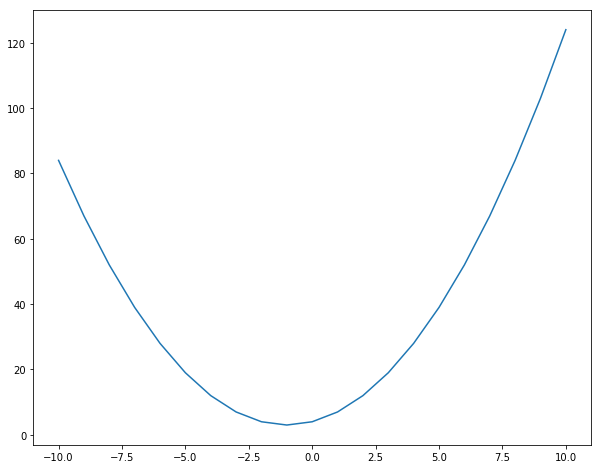

In [20]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()  

def my_formula(x):
    return x**2+2*x+4

graph(my_formula, range(-10, 11))

## Gradient

<center>$\frac{df(x)}{dx} = \lim_{h\ \to 0} \frac{f(x + h) - f(x)}{h}$</center>

In [21]:
def eval_numerical_gradient(f, x):
    """ 
    a naive implementation of numerical gradient of f at x 
    - f should be a function that takes a single argument
    - x is the point (numpy array) to evaluate the gradient at
    """ 

    fx = f(x) # evaluate function value at original point
    grad = np.zeros(x.shape)
    h = 0.00001

    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        old_value = x[ix]
        x[ix] = old_value + h # increment by h
        fxh = f(x) # evalute f(x + h)
        x[ix] = old_value # restore to previous value (very important!)

        # compute the partial derivative
        grad[ix] = (fxh - fx) / h # the slope
        it.iternext() # step to next dimension

    return grad

In [22]:
# to use the generic code above we want a function that takes a single argument
# (the weights in our case) so we close over X_train and Y_train
def CIFAR10_loss_fun(W):
    data_batch = np.random.choice(len(Xtr_rows), 256, replace=False)
    
    return L(Xtr_rows[data_batch], Ytr[data_batch], W)

In [23]:
weights = np.random.rand(10, 3072) * 0.001
step_size = 0.000000001
for i in range(1000):
    
    print(time.strftime('%X'))
    print('gradient', i)
    df = eval_numerical_gradient(CIFAR10_loss_fun, weights) 
    weights += - step_size * df
    print(time.strftime('%X'))
    
    # test results:
    print('test')
    num_test = 5000
    Ypred = np.zeros(num_test)
    for i in range(num_test):
        scores = weights.dot(Xte_rows[i])
        max_index = np.argmax(scores)
        Ypred[i] = max_index
    print(time.strftime('%X'))

    print('accuracy: %f' % ( np.mean(Ypred == Yte[:num_test]) ))
    
    

11:15:40
gradient 0
11:21:04
test
11:21:04
accuracy: 0.098200
11:21:04
gradient 1
11:26:36
test
11:26:36
accuracy: 0.098600
11:26:36
gradient 2
11:32:02
test
11:32:02
accuracy: 0.101400
11:32:02
gradient 3
11:37:31
test
11:37:31
accuracy: 0.091200
11:37:31
gradient 4
11:42:55
test
11:42:55
accuracy: 0.105200
11:42:55
gradient 5
11:48:22
test
11:48:22
accuracy: 0.129600
11:48:22
gradient 6
11:53:49
test
11:53:50
accuracy: 0.101200
11:53:50
gradient 7
11:59:16
test
11:59:16
accuracy: 0.100800
11:59:16
gradient 8
12:04:35
test
12:04:35
accuracy: 0.112000
12:04:35
gradient 9
12:09:54
test
12:09:54
accuracy: 0.091600
12:09:54
gradient 10
12:15:25
test
12:15:25
accuracy: 0.095600
12:15:25
gradient 11
12:21:05
test
12:21:05
accuracy: 0.102200
12:21:05
gradient 12
12:26:24
test
12:26:24
accuracy: 0.089600
12:26:24
gradient 13
12:31:40
test
12:31:40
accuracy: 0.068200
12:31:40
gradient 14
12:40:28
test
12:40:28
accuracy: 0.112600
12:40:28
gradient 15
12:47:42
test
12:47:42
accuracy: 0.088000
12

KeyboardInterrupt: 

$L_i = \sum_{j\neq y_i} \left[ \max(0, w_j^Tx_i - w_{y_i}^Tx_i + \Delta) \right]$

$\nabla_{w_{y_i}} L_i = - \left( \sum_{j\neq y_i} \mathbb{1}(w_j^Tx_i - w_{y_i}^Tx_i + \Delta > 0) \right) x_i$

$\nabla_{w_j} L_i = \mathbb{1}(w_j^Tx_i - w_{y_i}^Tx_i + \Delta > 0) x_i$

In [46]:
def eval_gradient_analytically(x, y, W):
    grad = np.zeros(x.shape)
    
    delta = 1.0
    scores = W.dot(x)
    margins = scores - scores[y] + delta
    
    n = 0
    for i in range(len(margins)):
        if i == y:
            continue
        
        if margins[i] > 0:
            n += 1          
    grad_yi = -n * x # [12....3042]
    
    n = np.zeros(10)
    for i in range(len(margins)):        
        if margins[i] > 0:
            n[i]= 1     
        else:
            n[i]= 0
            
    grad = np.reshape(n, (10, 1)) * x
    
    grad[y] = grad_yi
    
    return grad

In [52]:
weights = np.random.rand(10, 3072) * 0.001
step_size = 0.000000001
for i in range(10000):

    item = randint(0, len(Ytr))
    df = eval_gradient_analytically(Xtr_rows[item], Ytr[item], weights)
    weights += - step_size * df
    
    # test results:
    num_test = 5000
    Ypred = np.zeros(num_test)
    for i in range(num_test):
        scores = weights.dot(Xte_rows[i])
        max_index = np.argmax(scores)
        Ypred[i] = max_index

    print('accuracy: %f' % ( np.mean(Ypred == Yte[:num_test]) ))

accuracy: 0.090800
accuracy: 0.090800
accuracy: 0.090800
accuracy: 0.090400
accuracy: 0.090400
accuracy: 0.090400
accuracy: 0.090000
accuracy: 0.088200
accuracy: 0.089000
accuracy: 0.088600
accuracy: 0.089200
accuracy: 0.089200
accuracy: 0.089600
accuracy: 0.089400
accuracy: 0.090000
accuracy: 0.090400
accuracy: 0.090400
accuracy: 0.091200
accuracy: 0.092600
accuracy: 0.089000
accuracy: 0.088600
accuracy: 0.088200
accuracy: 0.088200
accuracy: 0.088800
accuracy: 0.091200
accuracy: 0.092200
accuracy: 0.092400
accuracy: 0.093000
accuracy: 0.091000
accuracy: 0.091200
accuracy: 0.092200
accuracy: 0.090800
accuracy: 0.091400
accuracy: 0.091800
accuracy: 0.092000
accuracy: 0.092000
accuracy: 0.093000
accuracy: 0.093000
accuracy: 0.092000
accuracy: 0.093600
accuracy: 0.093400
accuracy: 0.093600
accuracy: 0.093000
accuracy: 0.092000
accuracy: 0.092200
accuracy: 0.095800
accuracy: 0.095600
accuracy: 0.096200
accuracy: 0.096600
accuracy: 0.094800
accuracy: 0.094800
accuracy: 0.094400
accuracy: 0.

accuracy: 0.112000
accuracy: 0.108600
accuracy: 0.108600
accuracy: 0.109400
accuracy: 0.111400
accuracy: 0.114600
accuracy: 0.115800
accuracy: 0.119000
accuracy: 0.119600
accuracy: 0.121000
accuracy: 0.121800
accuracy: 0.122600
accuracy: 0.119600
accuracy: 0.117400
accuracy: 0.117200
accuracy: 0.124200
accuracy: 0.123200
accuracy: 0.124800
accuracy: 0.119600
accuracy: 0.116200
accuracy: 0.119800
accuracy: 0.119800
accuracy: 0.119800
accuracy: 0.118800
accuracy: 0.121000
accuracy: 0.121600
accuracy: 0.121000
accuracy: 0.120600
accuracy: 0.112600
accuracy: 0.112400
accuracy: 0.116000
accuracy: 0.114800
accuracy: 0.117000
accuracy: 0.118400
accuracy: 0.117800
accuracy: 0.114200
accuracy: 0.117600
accuracy: 0.119800
accuracy: 0.119400
accuracy: 0.121600
accuracy: 0.120600
accuracy: 0.116400
accuracy: 0.113600
accuracy: 0.114400
accuracy: 0.113400
accuracy: 0.112200
accuracy: 0.113000
accuracy: 0.112600
accuracy: 0.113400
accuracy: 0.118000
accuracy: 0.119400
accuracy: 0.121400
accuracy: 0.

accuracy: 0.138000
accuracy: 0.141400
accuracy: 0.144600
accuracy: 0.139400
accuracy: 0.141400
accuracy: 0.137400
accuracy: 0.138600
accuracy: 0.140200
accuracy: 0.142600
accuracy: 0.144400
accuracy: 0.145000
accuracy: 0.148600
accuracy: 0.146000
accuracy: 0.144400
accuracy: 0.146800
accuracy: 0.146600
accuracy: 0.146600
accuracy: 0.145800
accuracy: 0.146400
accuracy: 0.151200
accuracy: 0.154200
accuracy: 0.156200
accuracy: 0.155600
accuracy: 0.153200
accuracy: 0.152800
accuracy: 0.150800
accuracy: 0.150000
accuracy: 0.152600
accuracy: 0.150000
accuracy: 0.147800
accuracy: 0.150000
accuracy: 0.146800
accuracy: 0.148400
accuracy: 0.150000
accuracy: 0.149600
accuracy: 0.150200
accuracy: 0.150200
accuracy: 0.151200
accuracy: 0.149800
accuracy: 0.149000
accuracy: 0.148200
accuracy: 0.142000
accuracy: 0.141800
accuracy: 0.146800
accuracy: 0.147200
accuracy: 0.145200
accuracy: 0.149200
accuracy: 0.142800
accuracy: 0.143600
accuracy: 0.144400
accuracy: 0.143800
accuracy: 0.144000
accuracy: 0.

accuracy: 0.145200
accuracy: 0.142600
accuracy: 0.152400
accuracy: 0.148200
accuracy: 0.141200
accuracy: 0.148200
accuracy: 0.148000
accuracy: 0.146400
accuracy: 0.149600
accuracy: 0.146200
accuracy: 0.146600
accuracy: 0.141000
accuracy: 0.138400
accuracy: 0.138000
accuracy: 0.137400
accuracy: 0.145800
accuracy: 0.148000
accuracy: 0.150400
accuracy: 0.152400
accuracy: 0.153600
accuracy: 0.154600
accuracy: 0.154400
accuracy: 0.156600
accuracy: 0.160400
accuracy: 0.162000
accuracy: 0.145000
accuracy: 0.145400
accuracy: 0.153000
accuracy: 0.154800
accuracy: 0.157200
accuracy: 0.156600
accuracy: 0.156600
accuracy: 0.158400
accuracy: 0.145800
accuracy: 0.155200
accuracy: 0.151600
accuracy: 0.141800
accuracy: 0.140400
accuracy: 0.143200
accuracy: 0.142800
accuracy: 0.147400
accuracy: 0.145400
accuracy: 0.151800
accuracy: 0.151000
accuracy: 0.156400
accuracy: 0.155400
accuracy: 0.153800
accuracy: 0.151600
accuracy: 0.154200
accuracy: 0.157400
accuracy: 0.163200
accuracy: 0.165000
accuracy: 0.

accuracy: 0.169200
accuracy: 0.167400
accuracy: 0.167200
accuracy: 0.172200
accuracy: 0.171600
accuracy: 0.172600
accuracy: 0.174800
accuracy: 0.177400
accuracy: 0.179800
accuracy: 0.177000
accuracy: 0.172200
accuracy: 0.174000
accuracy: 0.173800
accuracy: 0.177000
accuracy: 0.177600
accuracy: 0.173600
accuracy: 0.172200
accuracy: 0.169800
accuracy: 0.169200
accuracy: 0.168800
accuracy: 0.175800
accuracy: 0.175800
accuracy: 0.178200
accuracy: 0.179800
accuracy: 0.177800
accuracy: 0.174800
accuracy: 0.176000
accuracy: 0.180800
accuracy: 0.180200
accuracy: 0.178800
accuracy: 0.185000
accuracy: 0.180000
accuracy: 0.182200
accuracy: 0.183800
accuracy: 0.185600
accuracy: 0.185400
accuracy: 0.183600
accuracy: 0.179800
accuracy: 0.183200
accuracy: 0.181600
accuracy: 0.179600
accuracy: 0.182000
accuracy: 0.179200
accuracy: 0.176800
accuracy: 0.178800
accuracy: 0.178800
accuracy: 0.180800
accuracy: 0.182600
accuracy: 0.184000
accuracy: 0.176200
accuracy: 0.173600
accuracy: 0.173600
accuracy: 0.

accuracy: 0.183400
accuracy: 0.184600
accuracy: 0.188800
accuracy: 0.190400
accuracy: 0.189000
accuracy: 0.188400
accuracy: 0.187800
accuracy: 0.189400
accuracy: 0.192200
accuracy: 0.189200
accuracy: 0.181400
accuracy: 0.181200
accuracy: 0.181800
accuracy: 0.186200
accuracy: 0.185800
accuracy: 0.190800
accuracy: 0.190200
accuracy: 0.187800
accuracy: 0.185000
accuracy: 0.187400
accuracy: 0.189000
accuracy: 0.185000
accuracy: 0.184000
accuracy: 0.192000
accuracy: 0.189800
accuracy: 0.193000
accuracy: 0.194000
accuracy: 0.195200
accuracy: 0.195000
accuracy: 0.188000
accuracy: 0.189400
accuracy: 0.189400
accuracy: 0.187200
accuracy: 0.187000
accuracy: 0.185000
accuracy: 0.192000
accuracy: 0.193400
accuracy: 0.196000
accuracy: 0.191400
accuracy: 0.191200
accuracy: 0.193000
accuracy: 0.186000
accuracy: 0.188200
accuracy: 0.188000
accuracy: 0.187600
accuracy: 0.187600
accuracy: 0.177800
accuracy: 0.184000
accuracy: 0.188800
accuracy: 0.183600
accuracy: 0.184800
accuracy: 0.183400
accuracy: 0.

accuracy: 0.199800
accuracy: 0.199200
accuracy: 0.200600
accuracy: 0.200400
accuracy: 0.189800
accuracy: 0.188000
accuracy: 0.184400
accuracy: 0.189600
accuracy: 0.190600
accuracy: 0.181200
accuracy: 0.186200
accuracy: 0.191400
accuracy: 0.189800
accuracy: 0.189400
accuracy: 0.191000
accuracy: 0.191600
accuracy: 0.191400
accuracy: 0.181400
accuracy: 0.178600
accuracy: 0.175000
accuracy: 0.171600
accuracy: 0.175200
accuracy: 0.180800
accuracy: 0.181400
accuracy: 0.181400
accuracy: 0.184200
accuracy: 0.182400
accuracy: 0.184800
accuracy: 0.183600
accuracy: 0.182200
accuracy: 0.183400
accuracy: 0.185000
accuracy: 0.184800
accuracy: 0.182200
accuracy: 0.183200
accuracy: 0.183200
accuracy: 0.183600
accuracy: 0.189400
accuracy: 0.191800
accuracy: 0.194600
accuracy: 0.185400
accuracy: 0.186400
accuracy: 0.191600
accuracy: 0.191200
accuracy: 0.191400
accuracy: 0.189600
accuracy: 0.190800
accuracy: 0.188800
accuracy: 0.188600
accuracy: 0.193200
accuracy: 0.190800
accuracy: 0.191600
accuracy: 0.

accuracy: 0.206600
accuracy: 0.208200
accuracy: 0.209200
accuracy: 0.209600
accuracy: 0.209800
accuracy: 0.209600
accuracy: 0.205800
accuracy: 0.209400
accuracy: 0.211400
accuracy: 0.207600
accuracy: 0.209200
accuracy: 0.209200
accuracy: 0.206200
accuracy: 0.211200
accuracy: 0.215400
accuracy: 0.212800
accuracy: 0.215800
accuracy: 0.214400
accuracy: 0.214600
accuracy: 0.213600
accuracy: 0.212600
accuracy: 0.211800
accuracy: 0.211600
accuracy: 0.211800
accuracy: 0.216400
accuracy: 0.213200
accuracy: 0.209800
accuracy: 0.208600
accuracy: 0.208000
accuracy: 0.202400
accuracy: 0.200400
accuracy: 0.203400
accuracy: 0.203000
accuracy: 0.204400
accuracy: 0.206000
accuracy: 0.207600
accuracy: 0.210600
accuracy: 0.208800
accuracy: 0.209400
accuracy: 0.207400
accuracy: 0.207400
accuracy: 0.206800
accuracy: 0.205600
accuracy: 0.214200
accuracy: 0.213000
accuracy: 0.212400
accuracy: 0.212400
accuracy: 0.205600
accuracy: 0.205200
accuracy: 0.204200
accuracy: 0.204200
accuracy: 0.204800
accuracy: 0.

accuracy: 0.202000
accuracy: 0.201400
accuracy: 0.199400
accuracy: 0.199000
accuracy: 0.199000
accuracy: 0.199000
accuracy: 0.195000
accuracy: 0.199200
accuracy: 0.199200
accuracy: 0.190600
accuracy: 0.190200
accuracy: 0.196400
accuracy: 0.196000
accuracy: 0.196400
accuracy: 0.199600
accuracy: 0.200000
accuracy: 0.200000
accuracy: 0.196600
accuracy: 0.195200
accuracy: 0.198200
accuracy: 0.199000
accuracy: 0.197600
accuracy: 0.196800
accuracy: 0.196200
accuracy: 0.201000
accuracy: 0.201000
accuracy: 0.197600
accuracy: 0.197000
accuracy: 0.201200
accuracy: 0.201200
accuracy: 0.206600
accuracy: 0.207000
accuracy: 0.210800
accuracy: 0.210400
accuracy: 0.211200
accuracy: 0.201600
accuracy: 0.202400
accuracy: 0.202400
accuracy: 0.189600
accuracy: 0.184600
accuracy: 0.186600
accuracy: 0.180400
accuracy: 0.182200
accuracy: 0.181800
accuracy: 0.187600
accuracy: 0.179600
accuracy: 0.172800
accuracy: 0.180400
accuracy: 0.183000
accuracy: 0.181600
accuracy: 0.185200
accuracy: 0.187000
accuracy: 0.

accuracy: 0.210800
accuracy: 0.210800
accuracy: 0.211200
accuracy: 0.206800
accuracy: 0.204000
accuracy: 0.204400
accuracy: 0.204200
accuracy: 0.207200
accuracy: 0.208000
accuracy: 0.210800
accuracy: 0.210000
accuracy: 0.210400
accuracy: 0.209200
accuracy: 0.210000
accuracy: 0.214000
accuracy: 0.214000
accuracy: 0.213400
accuracy: 0.207200
accuracy: 0.209400
accuracy: 0.213000
accuracy: 0.209800
accuracy: 0.203800
accuracy: 0.204400
accuracy: 0.210400
accuracy: 0.200400
accuracy: 0.202400
accuracy: 0.202000
accuracy: 0.197200
accuracy: 0.198800
accuracy: 0.202600
accuracy: 0.202800
accuracy: 0.202200
accuracy: 0.202000
accuracy: 0.202400
accuracy: 0.207200
accuracy: 0.211400
accuracy: 0.212800
accuracy: 0.210400
accuracy: 0.208600
accuracy: 0.209600
accuracy: 0.217400
accuracy: 0.213800
accuracy: 0.222000
accuracy: 0.223400
accuracy: 0.224600
accuracy: 0.218600
accuracy: 0.216800
accuracy: 0.218600
accuracy: 0.218400
accuracy: 0.217600
accuracy: 0.219200
accuracy: 0.218800
accuracy: 0.

accuracy: 0.223200
accuracy: 0.227000
accuracy: 0.225600
accuracy: 0.223000
accuracy: 0.211000
accuracy: 0.215000
accuracy: 0.219400
accuracy: 0.220800
accuracy: 0.222200
accuracy: 0.221200
accuracy: 0.221800
accuracy: 0.223800
accuracy: 0.225200
accuracy: 0.224200
accuracy: 0.224200
accuracy: 0.220600
accuracy: 0.225600
accuracy: 0.228800
accuracy: 0.231800
accuracy: 0.233400
accuracy: 0.233400
accuracy: 0.233000
accuracy: 0.232600
accuracy: 0.233000
accuracy: 0.229400
accuracy: 0.230400
accuracy: 0.228600
accuracy: 0.225400
accuracy: 0.230200
accuracy: 0.227400
accuracy: 0.224400
accuracy: 0.227800
accuracy: 0.227200
accuracy: 0.226200
accuracy: 0.226000
accuracy: 0.228000
accuracy: 0.230400
accuracy: 0.229400
accuracy: 0.229400
accuracy: 0.225200
accuracy: 0.228400
accuracy: 0.226400
accuracy: 0.227000
accuracy: 0.230600
accuracy: 0.236600
accuracy: 0.237400
accuracy: 0.236400
accuracy: 0.242400
accuracy: 0.245400
accuracy: 0.245200
accuracy: 0.238800
accuracy: 0.237800
accuracy: 0.

accuracy: 0.216600
accuracy: 0.219600
accuracy: 0.220000
accuracy: 0.223000
accuracy: 0.210600
accuracy: 0.213400
accuracy: 0.214400
accuracy: 0.217200
accuracy: 0.222200
accuracy: 0.219200
accuracy: 0.221000
accuracy: 0.223000
accuracy: 0.223600
accuracy: 0.220600
accuracy: 0.225000
accuracy: 0.221400
accuracy: 0.220600
accuracy: 0.216600
accuracy: 0.216800
accuracy: 0.220400
accuracy: 0.219200
accuracy: 0.218200
accuracy: 0.218600
accuracy: 0.218600
accuracy: 0.220600
accuracy: 0.220000
accuracy: 0.220000
accuracy: 0.224200
accuracy: 0.224200
accuracy: 0.225400
accuracy: 0.226800
accuracy: 0.227600
accuracy: 0.226000
accuracy: 0.225800
accuracy: 0.227400
accuracy: 0.226400
accuracy: 0.229800
accuracy: 0.229800
accuracy: 0.237200
accuracy: 0.233400
accuracy: 0.227600
accuracy: 0.226600
accuracy: 0.221400
accuracy: 0.224800
accuracy: 0.224600
accuracy: 0.223200
accuracy: 0.225800
accuracy: 0.223800
accuracy: 0.223800
accuracy: 0.224200
accuracy: 0.223800
accuracy: 0.223800
accuracy: 0.

accuracy: 0.234000
accuracy: 0.235600
accuracy: 0.237200
accuracy: 0.229200
accuracy: 0.228800
accuracy: 0.229400
accuracy: 0.235400
accuracy: 0.233400
accuracy: 0.235400
accuracy: 0.237800
accuracy: 0.236400
accuracy: 0.235200
accuracy: 0.238000
accuracy: 0.237000
accuracy: 0.233200
accuracy: 0.235000
accuracy: 0.233400
accuracy: 0.228400
accuracy: 0.231000
accuracy: 0.231400
accuracy: 0.231400
accuracy: 0.232000
accuracy: 0.228800
accuracy: 0.226400
accuracy: 0.226200
accuracy: 0.224200
accuracy: 0.224000
accuracy: 0.224400
accuracy: 0.221600
accuracy: 0.222600
accuracy: 0.226600
accuracy: 0.229800
accuracy: 0.230600
accuracy: 0.231600
accuracy: 0.221400
accuracy: 0.225600
accuracy: 0.225600
accuracy: 0.229000
accuracy: 0.229000
accuracy: 0.226200
accuracy: 0.229200
accuracy: 0.227800
accuracy: 0.226000
accuracy: 0.226800
accuracy: 0.226800
accuracy: 0.226200
accuracy: 0.222200
accuracy: 0.222600
accuracy: 0.219200
accuracy: 0.216400
accuracy: 0.216400
accuracy: 0.214600
accuracy: 0.

accuracy: 0.230400
accuracy: 0.229400
accuracy: 0.228000
accuracy: 0.228000
accuracy: 0.228000
accuracy: 0.228000
accuracy: 0.228600
accuracy: 0.229000
accuracy: 0.232000
accuracy: 0.235600
accuracy: 0.230400
accuracy: 0.227200
accuracy: 0.224000
accuracy: 0.226800
accuracy: 0.226000
accuracy: 0.226400
accuracy: 0.225200
accuracy: 0.226200
accuracy: 0.223600
accuracy: 0.220200
accuracy: 0.219400
accuracy: 0.221800
accuracy: 0.225000
accuracy: 0.227400
accuracy: 0.227200
accuracy: 0.229000
accuracy: 0.232400
accuracy: 0.231000
accuracy: 0.232600
accuracy: 0.230200
accuracy: 0.232600
accuracy: 0.228200
accuracy: 0.228400
accuracy: 0.231000
accuracy: 0.233200
accuracy: 0.225600
accuracy: 0.225200
accuracy: 0.225200
accuracy: 0.229400
accuracy: 0.229000
accuracy: 0.229200
accuracy: 0.228600
accuracy: 0.228400
accuracy: 0.216800
accuracy: 0.213800
accuracy: 0.214400
accuracy: 0.214400
accuracy: 0.219400
accuracy: 0.217400
accuracy: 0.221800
accuracy: 0.223600
accuracy: 0.196400
accuracy: 0.

accuracy: 0.237800
accuracy: 0.241000
accuracy: 0.243000
accuracy: 0.243000
accuracy: 0.240400
accuracy: 0.237400
accuracy: 0.237000
accuracy: 0.237000
accuracy: 0.240600
accuracy: 0.237000
accuracy: 0.234200
accuracy: 0.235400
accuracy: 0.219200
accuracy: 0.221200
accuracy: 0.226600
accuracy: 0.217600
accuracy: 0.220200
accuracy: 0.220400
accuracy: 0.222800
accuracy: 0.220400
accuracy: 0.221200
accuracy: 0.223800
accuracy: 0.227600
accuracy: 0.227600
accuracy: 0.223200
accuracy: 0.223000
accuracy: 0.223400
accuracy: 0.227400
accuracy: 0.229800
accuracy: 0.231400
accuracy: 0.231800
accuracy: 0.233800
accuracy: 0.231600
accuracy: 0.236600
accuracy: 0.237400
accuracy: 0.238600
accuracy: 0.239200
accuracy: 0.239800
accuracy: 0.235000
accuracy: 0.235000
accuracy: 0.235000
accuracy: 0.237400
accuracy: 0.242600
accuracy: 0.240800
accuracy: 0.237400
accuracy: 0.237000
accuracy: 0.237800
accuracy: 0.238800
accuracy: 0.241800
accuracy: 0.248000
accuracy: 0.239800
accuracy: 0.237800
accuracy: 0.

accuracy: 0.234200
accuracy: 0.233200
accuracy: 0.234400
accuracy: 0.236200
accuracy: 0.237200
accuracy: 0.230400
accuracy: 0.233800
accuracy: 0.231400
accuracy: 0.219200
accuracy: 0.218800
accuracy: 0.221600
accuracy: 0.227000
accuracy: 0.230800
accuracy: 0.232600
accuracy: 0.236600
accuracy: 0.237200
accuracy: 0.243000
accuracy: 0.247400
accuracy: 0.245000
accuracy: 0.245600
accuracy: 0.234800
accuracy: 0.233000
accuracy: 0.235800
accuracy: 0.237600
accuracy: 0.238200
accuracy: 0.234600
accuracy: 0.236400
accuracy: 0.234000
accuracy: 0.235800
accuracy: 0.239400
accuracy: 0.240000
accuracy: 0.246600
accuracy: 0.252200
accuracy: 0.250600
accuracy: 0.249600
accuracy: 0.247200
accuracy: 0.246000
accuracy: 0.245600
accuracy: 0.246400
accuracy: 0.248400
accuracy: 0.251800
accuracy: 0.248400
accuracy: 0.250800
accuracy: 0.250200
accuracy: 0.255000
accuracy: 0.256600
accuracy: 0.253800
accuracy: 0.257400
accuracy: 0.255000
accuracy: 0.254800
accuracy: 0.252600
accuracy: 0.253200
accuracy: 0.

accuracy: 0.225400
accuracy: 0.227000
accuracy: 0.229000
accuracy: 0.229200
accuracy: 0.234800
accuracy: 0.229000
accuracy: 0.229800
accuracy: 0.230000
accuracy: 0.230000
accuracy: 0.225000
accuracy: 0.233200
accuracy: 0.236400
accuracy: 0.240200
accuracy: 0.235400
accuracy: 0.231800
accuracy: 0.232800
accuracy: 0.229000
accuracy: 0.234800
accuracy: 0.234800
accuracy: 0.237000
accuracy: 0.242000
accuracy: 0.246600
accuracy: 0.246400
accuracy: 0.247400
accuracy: 0.247400
accuracy: 0.241800
accuracy: 0.241800
accuracy: 0.240600
accuracy: 0.241000
accuracy: 0.232600
accuracy: 0.228200
accuracy: 0.229800
accuracy: 0.232400
accuracy: 0.219400
accuracy: 0.223400
accuracy: 0.227000
accuracy: 0.227000
accuracy: 0.227400
accuracy: 0.227400
accuracy: 0.228600
accuracy: 0.229800
accuracy: 0.234000
accuracy: 0.235200
accuracy: 0.233400
accuracy: 0.234800
accuracy: 0.236800
accuracy: 0.242000
accuracy: 0.242000
accuracy: 0.241400
accuracy: 0.246400
accuracy: 0.251800
accuracy: 0.247200
accuracy: 0.

accuracy: 0.257200
accuracy: 0.258800
accuracy: 0.257400
accuracy: 0.256200
accuracy: 0.260000
accuracy: 0.261400
accuracy: 0.265000
accuracy: 0.261400
accuracy: 0.258800
accuracy: 0.256400
accuracy: 0.258600
accuracy: 0.261600
accuracy: 0.258400
accuracy: 0.258000
accuracy: 0.243600
accuracy: 0.244600
accuracy: 0.248600
accuracy: 0.244000
accuracy: 0.243800
accuracy: 0.247600
accuracy: 0.247600
accuracy: 0.255200
accuracy: 0.250400
accuracy: 0.251400
accuracy: 0.252000
accuracy: 0.251600
accuracy: 0.240000
accuracy: 0.241800
accuracy: 0.243400
accuracy: 0.230200
accuracy: 0.218400
accuracy: 0.209600
accuracy: 0.213400
accuracy: 0.212800
accuracy: 0.218200
accuracy: 0.222400
accuracy: 0.222400
accuracy: 0.223800
accuracy: 0.225000
accuracy: 0.230200
accuracy: 0.228600
accuracy: 0.234800
accuracy: 0.235800
accuracy: 0.237800
accuracy: 0.242600
accuracy: 0.245200
accuracy: 0.245800
accuracy: 0.248800
accuracy: 0.246000
accuracy: 0.247200
accuracy: 0.246400
accuracy: 0.249600
accuracy: 0.

accuracy: 0.251000
accuracy: 0.246800
accuracy: 0.251400
accuracy: 0.251600
accuracy: 0.254400
accuracy: 0.256400
accuracy: 0.253200
accuracy: 0.255000
accuracy: 0.257400
accuracy: 0.257000
accuracy: 0.260800
accuracy: 0.264400
accuracy: 0.256200
accuracy: 0.264000
accuracy: 0.263800
accuracy: 0.264800
accuracy: 0.263600
accuracy: 0.264400
accuracy: 0.270000
accuracy: 0.271600
accuracy: 0.264800
accuracy: 0.265000
accuracy: 0.259200
accuracy: 0.256600
accuracy: 0.249400
accuracy: 0.249200
accuracy: 0.252600
accuracy: 0.254400
accuracy: 0.254400
accuracy: 0.254800
accuracy: 0.257200
accuracy: 0.257800
accuracy: 0.265800
accuracy: 0.267800
accuracy: 0.271800
accuracy: 0.268400
accuracy: 0.269400
accuracy: 0.266000
accuracy: 0.266000
accuracy: 0.262400
accuracy: 0.262600
accuracy: 0.263600
accuracy: 0.267800
accuracy: 0.263600
accuracy: 0.257000
accuracy: 0.256200
accuracy: 0.261600
accuracy: 0.263200
accuracy: 0.263000
accuracy: 0.263000
accuracy: 0.265600
accuracy: 0.264200
accuracy: 0.

accuracy: 0.240000
accuracy: 0.240000
accuracy: 0.243600
accuracy: 0.231000
accuracy: 0.233600
accuracy: 0.236400
accuracy: 0.242800
accuracy: 0.246000
accuracy: 0.243000
accuracy: 0.243800
accuracy: 0.243800
accuracy: 0.243800
accuracy: 0.243800
accuracy: 0.246400
accuracy: 0.246600
accuracy: 0.248400
accuracy: 0.249800
accuracy: 0.254400
accuracy: 0.257200
accuracy: 0.260400
accuracy: 0.258000
accuracy: 0.257400
accuracy: 0.257400
accuracy: 0.255200
accuracy: 0.252600
accuracy: 0.251400
accuracy: 0.250200
accuracy: 0.252400
accuracy: 0.252400
accuracy: 0.261400
accuracy: 0.261800
accuracy: 0.260800
accuracy: 0.260600
accuracy: 0.255600
accuracy: 0.253000
accuracy: 0.254400
accuracy: 0.257200
accuracy: 0.257400
accuracy: 0.252400
accuracy: 0.255600
accuracy: 0.257000
accuracy: 0.256200
accuracy: 0.256200
accuracy: 0.256000
accuracy: 0.256800
accuracy: 0.261000
accuracy: 0.257400
accuracy: 0.256200
accuracy: 0.256200
accuracy: 0.255000
accuracy: 0.256200
accuracy: 0.257200
accuracy: 0.

accuracy: 0.243000
accuracy: 0.239000
accuracy: 0.242200
accuracy: 0.245200
accuracy: 0.246800
accuracy: 0.248000
accuracy: 0.252800
accuracy: 0.252800
accuracy: 0.244200
accuracy: 0.246600
accuracy: 0.242800
accuracy: 0.242800
accuracy: 0.244600
accuracy: 0.248200
accuracy: 0.248600
accuracy: 0.248000
accuracy: 0.247600
accuracy: 0.251200
accuracy: 0.247000
accuracy: 0.241800
accuracy: 0.249200
accuracy: 0.249200
accuracy: 0.251600
accuracy: 0.253800
accuracy: 0.254000
accuracy: 0.259600
accuracy: 0.250600
accuracy: 0.251600
accuracy: 0.253400
accuracy: 0.253400
accuracy: 0.254600
accuracy: 0.258400
accuracy: 0.254000
accuracy: 0.254400
accuracy: 0.254000
accuracy: 0.258600
accuracy: 0.261600
accuracy: 0.262200
accuracy: 0.259000
accuracy: 0.263000
accuracy: 0.258600
accuracy: 0.261600
accuracy: 0.264800
accuracy: 0.271000
accuracy: 0.265200
accuracy: 0.265400
accuracy: 0.265200
accuracy: 0.267200
accuracy: 0.269800
accuracy: 0.257400
accuracy: 0.257800
accuracy: 0.260600
accuracy: 0.

accuracy: 0.263600
accuracy: 0.264000
accuracy: 0.267200
accuracy: 0.272200
accuracy: 0.276000
accuracy: 0.275800
accuracy: 0.275200
accuracy: 0.275400
accuracy: 0.272000
accuracy: 0.267800
accuracy: 0.265000
accuracy: 0.260800
accuracy: 0.261800
accuracy: 0.264200
accuracy: 0.264200
accuracy: 0.266600
accuracy: 0.265400
accuracy: 0.265400
accuracy: 0.260400
accuracy: 0.261200
accuracy: 0.256400
accuracy: 0.255200
accuracy: 0.263800
accuracy: 0.262200
accuracy: 0.263800
accuracy: 0.265200
accuracy: 0.263400
accuracy: 0.263200
accuracy: 0.258800
accuracy: 0.257200
accuracy: 0.258000
accuracy: 0.258000
accuracy: 0.254800
accuracy: 0.255000
accuracy: 0.258200
accuracy: 0.261400
accuracy: 0.259400
accuracy: 0.259000
accuracy: 0.253200
accuracy: 0.251400
accuracy: 0.249200
accuracy: 0.247000
accuracy: 0.246600
accuracy: 0.249200
accuracy: 0.250200
accuracy: 0.252800
accuracy: 0.253200
accuracy: 0.253000
accuracy: 0.257200
accuracy: 0.257200
accuracy: 0.258600
accuracy: 0.257800
accuracy: 0.

accuracy: 0.263200
accuracy: 0.265400
accuracy: 0.265400
accuracy: 0.264600
accuracy: 0.273200
accuracy: 0.273600
accuracy: 0.275800
accuracy: 0.277400
accuracy: 0.280000
accuracy: 0.282000
accuracy: 0.279600
accuracy: 0.280400
accuracy: 0.281800
accuracy: 0.281200
accuracy: 0.284400
accuracy: 0.280600
accuracy: 0.281400
accuracy: 0.280200
accuracy: 0.274400
accuracy: 0.276200
accuracy: 0.273000
accuracy: 0.271400
accuracy: 0.272800
accuracy: 0.275800
accuracy: 0.275800
accuracy: 0.276600
accuracy: 0.279800
accuracy: 0.274800
accuracy: 0.274200
accuracy: 0.272200
accuracy: 0.270800
accuracy: 0.272400
accuracy: 0.269600
accuracy: 0.271400
accuracy: 0.274400
accuracy: 0.272600
accuracy: 0.266400
accuracy: 0.265400
accuracy: 0.265600
accuracy: 0.267400
accuracy: 0.268800
accuracy: 0.266800
accuracy: 0.267400
accuracy: 0.269600
accuracy: 0.272000
accuracy: 0.271600
accuracy: 0.272600
accuracy: 0.267200
accuracy: 0.269600
accuracy: 0.268800
accuracy: 0.269800
accuracy: 0.272200
accuracy: 0.

accuracy: 0.269800
accuracy: 0.271800
accuracy: 0.266600
accuracy: 0.267400
accuracy: 0.269800
accuracy: 0.272000
accuracy: 0.278400
accuracy: 0.278200
accuracy: 0.274800
accuracy: 0.278600
accuracy: 0.277400
accuracy: 0.278200
accuracy: 0.278200
accuracy: 0.277400
accuracy: 0.273600
accuracy: 0.276200
accuracy: 0.278000
accuracy: 0.280800
accuracy: 0.280800
accuracy: 0.280600
accuracy: 0.279200
accuracy: 0.272400
accuracy: 0.264000
accuracy: 0.259600
accuracy: 0.261400
accuracy: 0.262800
accuracy: 0.264600
accuracy: 0.260400
accuracy: 0.258000
accuracy: 0.262200
accuracy: 0.262200
accuracy: 0.256800
accuracy: 0.257400
accuracy: 0.255800
accuracy: 0.259400
accuracy: 0.260200
accuracy: 0.262600
accuracy: 0.259200
accuracy: 0.258800
accuracy: 0.258800
accuracy: 0.254000
accuracy: 0.250600
accuracy: 0.251200
accuracy: 0.251200
accuracy: 0.251200
accuracy: 0.252800
accuracy: 0.253800
accuracy: 0.258200
accuracy: 0.258000
accuracy: 0.257400
accuracy: 0.258000
accuracy: 0.254600
accuracy: 0.